Superhost count:
 host_is_superhost
0    3025
1     777
Name: count, dtype: int64

Average response rate: 82.01394003156234

Average listings per host: 7.176223040504997


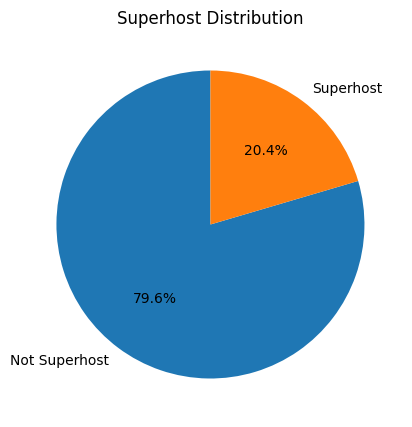

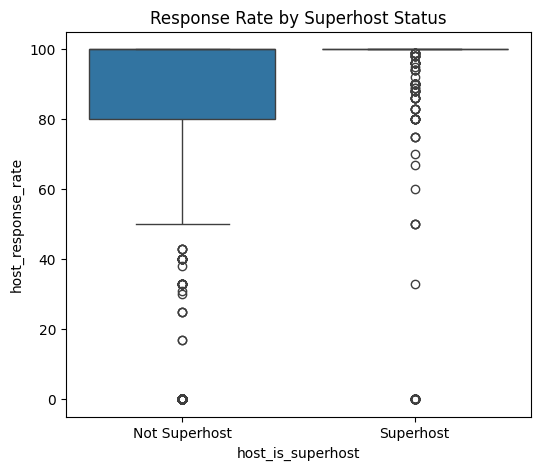

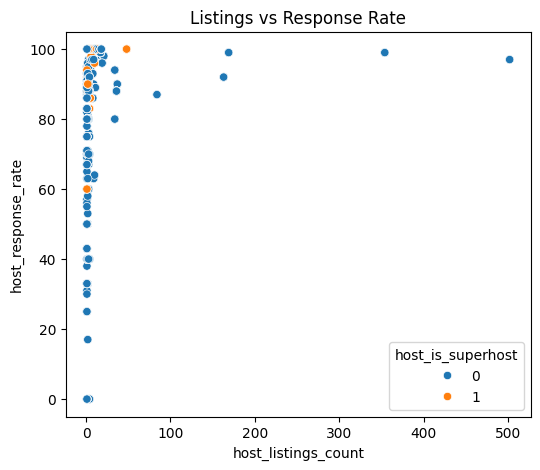

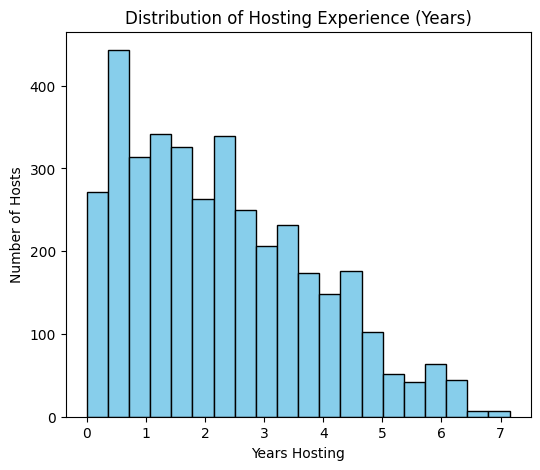

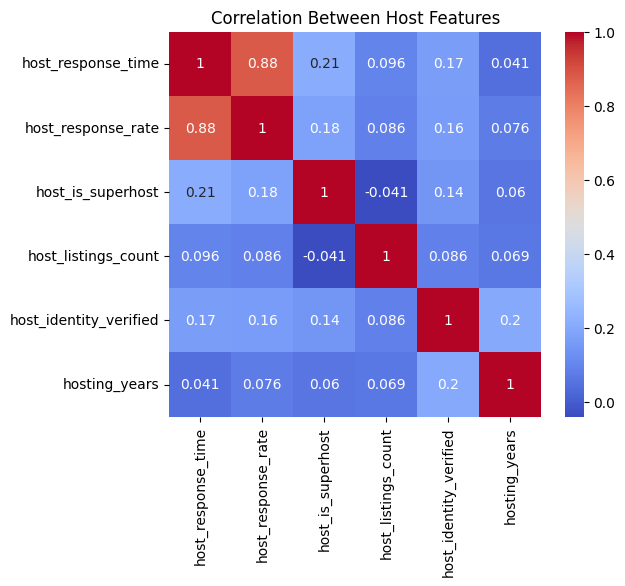

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Dataset.csv")

# Convert host_since to datetime
df["host_since"] = pd.to_datetime(df["host_since"], errors="coerce")
max_date = df["host_since"].max()
df["hosting_years"] = (max_date - df["host_since"]).dt.days / 365

# Host-related features we want
desired_features = [
    "host_response_time",
    "host_response_rate",
    "host_is_superhost",
    "host_listings_count",
    "host_identity_verified",
    "hosting_years"
]

# Keep only features that exist in the dataset
host_features = [col for col in desired_features if col in df.columns]
host_df = df[host_features]

# Basic stats
print("Superhost count:\n", host_df["host_is_superhost"].value_counts())
print("\nAverage response rate:", host_df["host_response_rate"].mean())
print("\nAverage listings per host:", host_df["host_listings_count"].mean())

# Pie chart – Superhost distribution
if "host_is_superhost" in host_df.columns:
    plt.figure(figsize=(5,5))
    superhost_counts = host_df["host_is_superhost"].value_counts()
    plt.pie(superhost_counts, labels=["Not Superhost", "Superhost"], autopct="%1.1f%%", startangle=90)
    plt.title("Superhost Distribution")
    plt.show()

# Boxplot – Response rate vs Superhost
if "host_is_superhost" in host_df.columns and "host_response_rate" in host_df.columns:
    plt.figure(figsize=(6,5))
    sns.boxplot(x="host_is_superhost", y="host_response_rate", data=host_df)
    plt.xticks([0,1], ["Not Superhost", "Superhost"])
    plt.title("Response Rate by Superhost Status")
    plt.show()

# Scatter plot – Listings vs Response rate
if "host_listings_count" in host_df.columns and "host_response_rate" in host_df.columns:
    plt.figure(figsize=(6,5))
    sns.scatterplot(x="host_listings_count", y="host_response_rate", hue="host_is_superhost", data=host_df)
    plt.title("Listings vs Response Rate")
    plt.show()

# Histogram – Hosting years distribution
if "hosting_years" in host_df.columns:
    plt.figure(figsize=(6,5))
    plt.hist(host_df["hosting_years"].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title("Distribution of Hosting Experience (Years)")
    plt.xlabel("Years Hosting")
    plt.ylabel("Number of Hosts")
    plt.show()

# Heatmap – Correlation between numeric host features
plt.figure(figsize=(6,5))
sns.heatmap(host_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Host Features")
plt.show()
